In [1]:
# import tensorflow as tf
# import keras
# from keras.models import Sequential
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
# from keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator

import scipy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
tf.__version__

'2.15.0'

## Initialize image data generator with rescaling 

In [3]:
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

## Preprocess all test images

In [4]:
train_generator = train_data_gen.flow_from_directory('train',
                                                    target_size=(48,48),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 28709 images belonging to 7 classes.


In [5]:
test_generator = test_data_gen.flow_from_directory('test',
                                                  target_size=(48,48),
                                                  color_mode="grayscale",
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 7178 images belonging to 7 classes.


## create a model structure

In [6]:
tf.random.set_seed(42)

# Define the model
emotion_model = Sequential()

# Add the layers
emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.5))
emotion_model.add(BatchNormalization())
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.5))
emotion_model.add(BatchNormalization())
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(500, kernel_size=(3, 3), activation="relu"))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.5))
emotion_model.add(BatchNormalization())

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation="relu"))
emotion_model.add(BatchNormalization())
emotion_model.add(Dropout(0.25))
emotion_model.add(Dense(1024, activation="relu"))
emotion_model.add(Dense(7, activation="softmax"))


# Compile the model
emotion_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# emotion_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
emotion_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 batch_normalization (Batch  (None, 22, 22, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)      

In [7]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    restore_best_weights = True
)

## Train the model

In [8]:
tf.random.set_seed(42)
emotion_model_info = emotion_model.fit(train_generator,
                                       epochs=15,
                                       validation_data=test_generator,
                                       callbacks=callback)

Epoch 1/15


898/898 [==============================] - 787s 873ms/step - loss: 2.0756 - accuracy: 0.2138 - val_loss: 1.8876 - val_accuracy: 0.2471
Epoch 2/15
898/898 [==============================] - 488s 544ms/step - loss: 1.7051 - accuracy: 0.3201 - val_loss: 1.9982 - val_accuracy: 0.2921
Epoch 3/15
898/898 [==============================] - 490s 546ms/step - loss: 1.5711 - accuracy: 0.3837 - val_loss: 1.5867 - val_accuracy: 0.4381
Epoch 4/15
898/898 [==============================] - 484s 539ms/step - loss: 1.4932 - accuracy: 0.4223 - val_loss: 1.9796 - val_accuracy: 0.3451
Epoch 5/15
898/898 [==============================] - 490s 546ms/step - loss: 1.4358 - accuracy: 0.4465 - val_loss: 1.6634 - val_accuracy: 0.3824
Epoch 6/15
898/898 [==============================] - 496s 552ms/step - loss: 1.3971 - accuracy: 0.4650 - val_loss: 3.0797 - val_accuracy: 0.4957
Epoch 7/15
898/898 [==============================] - 493s 549ms/step - loss: 1.3610 - accuracy: 0.4785 - val_loss: 3.5101

In [9]:
tf.__version__

'2.15.0'

In [10]:
import keras
print(keras.__version__)

2.15.0


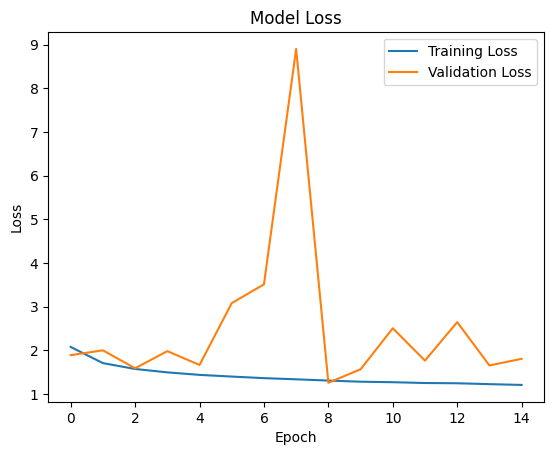

In [11]:

import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.plot(emotion_model_info.history['loss'], label='Training Loss')
plt.plot(emotion_model_info.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

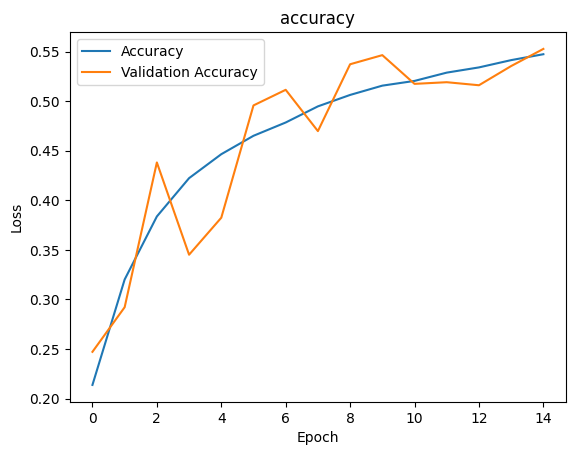

In [12]:
plt.plot(emotion_model_info.history['accuracy'], label='Accuracy')
plt.plot(emotion_model_info.history['val_accuracy'], label='Validation Accuracy')
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
import matplotlib.pyplot as plt

# Train the model
history = emotion_model.fit(train_generator,
                            epochs=30,
                            validation_data=test_generator,
                            callbacks=[callback])

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/30
  1/901 ━━━━━━━━━━━━━━━━━━━━ 17:09 1s/step - accuracy: 0.0312 - loss: 2.5113

/Users/sohampingale/anaconda3/envs/env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 79/901 ━━━━━━━━━━━━━━━━━━━━ 1:02 76ms/step - accuracy: 0.1807 - loss: 2.6643

KeyboardInterrupt: 

In [21]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

NameError: name 'history' is not defined

## save model structure structure in json file

In [13]:
model_json = emotion_model.to_json()
with open("emotion_model_1.json","w") as json_file:
    json_file.write(model_json)

## save trained model weight in .h5 file

In [14]:
emotion_model.save_weights('emotion_model_1.h5')